In [4]:
# LIBRARY HUB

import numpy as np
import pandas as pd
import json
import datetime

import re
import nltk
from nltk.corpus import stopwords

from collections import Counter

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import WordCloud


In [5]:
df_USA = pd.read_csv('Channel-Video/Youtube_videoData.csv')
df_USA.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [6]:
df_USA.shape

(226588, 16)

## DATASET DESCRIPTION:

Video ID: This alphanumeric code uniquely identifies each video. While not directly used for analysis, it serves as proof of the video's existence and authenticity.

Trending Date: This indicates when a video started trending. It's a crucial timestamp for tracking when a video gained popularity.

Title: The video's title summarizes its content or purpose. However, titles may sometimes contain clickbait or exaggerations to attract viewers.

Channel Title: This is the name of the YouTube channel that uploaded the video. It's mainly for identifying content creators and may not be a significant differentiator.

Category ID: YouTube assigns a category ID to each video based on its content. Creators can also set a category for better search and filtering.

Published Date: This represents the actual date when the video was uploaded or published. It's essential for understanding when an event or content was made available.

Tags: Tags are descriptive keywords that help connect videos through commonly recognized terms. They serve as unofficial categories for viewers.

Views, Likes, Dislikes, Comment Count: These numeric values measure engagement with the video. They reflect the video's popularity and audience interaction.

Thumbnail Link: This is the URL to the video's thumbnail image. Thumbnails with eye-catching visuals can attract more viewers. Analyzing thumbnails is a more advanced topic.

Comments Disabled, Ratings Disabled, Video Error or Removed: These Boolean values indicate whether comments, ratings, or the video itself are disabled or removed. They may be explored further if necessary.

Description: The video description is a text field that often includes emojis or ASCII characters. When used for analysis, these non-textual elements may need to be removed or processed.emoved or processed.

In [7]:
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226588 entries, 0 to 226587
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           226588 non-null  object
 1   title              226588 non-null  object
 2   publishedAt        226588 non-null  object
 3   channelId          226588 non-null  object
 4   channelTitle       226588 non-null  object
 5   categoryId         226588 non-null  int64 
 6   trending_date      226588 non-null  object
 7   tags               226588 non-null  object
 8   view_count         226588 non-null  int64 
 9   likes              226588 non-null  int64 
 10  dislikes           226588 non-null  int64 
 11  comment_count      226588 non-null  int64 
 12  thumbnail_link     226588 non-null  object
 13  comments_disabled  226588 non-null  bool  
 14  ratings_disabled   226588 non-null  bool  
 15  description        222210 non-null  object
dtypes: bool(2), int64(5)

### DATA CLEANING

In [8]:
# "Video_id" and "thumbnail_link" are not needed and will be removed.

df_USA.drop(columns=['video_id','thumbnail_link'],inplace=True, errors='ignore')

df_USA.head(n=2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


In [9]:
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226588 entries, 0 to 226587
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   title              226588 non-null  object
 1   publishedAt        226588 non-null  object
 2   channelId          226588 non-null  object
 3   channelTitle       226588 non-null  object
 4   categoryId         226588 non-null  int64 
 5   trending_date      226588 non-null  object
 6   tags               226588 non-null  object
 7   view_count         226588 non-null  int64 
 8   likes              226588 non-null  int64 
 9   dislikes           226588 non-null  int64 
 10  comment_count      226588 non-null  int64 
 11  comments_disabled  226588 non-null  bool  
 12  ratings_disabled   226588 non-null  bool  
 13  description        222210 non-null  object
dtypes: bool(2), int64(5), object(7)
memory usage: 21.2+ MB


In [10]:
# NULL COUNT

df_USA.isna().sum()

title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
comments_disabled       0
ratings_disabled        0
description          4378
dtype: int64

In [11]:
# DUPLICATE COUNT

df_USA.duplicated().sum()

83

----

<b>
The category_id column, currently containing numeric category IDs for each video, will be replaced with the corresponding category title. This will be achieved by utilizing the information available in a JSON file from the original Kaggle dataset, which contains details about each category (such as kind, etag, id, title, etc.). The focus here is solely on the id and title attributes. Consequently, a separate dictionary named "ID_to_Category" will be created to store the IDs as keys and their respective titles</b>.

In [12]:
file_path = 'Channel-Video/video_category_id.json'

with open(file_path) as f:
    category_data = json.load(f)

category_items = category_data['items']
num_categories = len(category_items)

ID_to_Category = {
    int(category_items[i]['id']): category_items[i]['snippet']['title']
    for i in range(num_categories)
}

In [13]:
ID_to_Category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [14]:
ID_to_Category.keys()

dict_keys([1, 2, 10, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [15]:
df_USA.head(2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


In [16]:
df_USA['categoryId'] = df_USA['categoryId'].apply(lambda x: ID_to_Category[x])
#Lets see the result
df_USA.head(n=2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


Data instancing will be performed to ensure that both the trending_date and publishedAt columns contain datetime.date objects. The trending_date column, which only includes the date, will be converted to datetime.date format to match the format of the publish_time column, which includes both the date and time of publication.

In [17]:
def split_trending_date(date):
    y,m,d = date.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

def split_publish_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

In [18]:
df_USA['trending_date'] = df_USA['trending_date'].apply(split_trending_date)
df_USA['publishedAt'] = df_USA['publishedAt'].apply(split_publish_time)

In [19]:
df_USA.head(2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


#### SPLITTING TAG DATA

In [20]:
df_USA[['tags']].head(2)

,tags
0,brawadis|prank|basketball|skits|ghost|funny vi...
1,Apex Legends|Apex Legends characters|new Apex ...


In [21]:
def clean_tags(tag):
    if tag == '[none]': return []
    return tag.lower().replace('"','').split('|')

In [22]:
df_USA['tags'] = df_USA['tags'].apply(clean_tags)
df_USA.head(2)

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,2020-08-12,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,2020-08-12,"[apex legends, apex legends characters, new ap...",2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."


In [23]:
df_USA['tags']

0         [brawadis, prank, basketball, skits, ghost, fu...
1         [apex legends, apex legends characters, new ap...
2         [jacksepticeye, funny, funny meme, memes, jack...
3         [xxl freshman, xxl freshmen, 2020 xxl freshman...
4         [the labrant family, diy, interior design, mak...
                                ...                        
226583                                             [[none]]
226584    [espn, sports, stephen a. smith, stephen a, st...
226585                                             [[none]]
226586    [drawing, humor, storytime animation, story, s...
226587    [televisa, univision, tudn, televisa deportes,...
Name: tags, Length: 226588, dtype: object

### TEXT PROCESSING

In [27]:
print(df_USA.shape)
df_USA.isna().sum()

(226588, 14)


title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
comments_disabled       0
ratings_disabled        0
description          4378
dtype: int64

In [29]:
df_USA.dropna(axis = 0, inplace = True)
df_USA.shape

(222210, 14)

In [30]:
df_USA['title']

0                        I ASKED HER TO BE MY GIRLFRIEND...
1         Apex Legends | Stories from the Outlands – “Th...
2         I left youtube for a month and THIS is what ha...
3         XXL 2020 Freshman Class Revealed - Official An...
4         Ultimate DIY Home Movie Theater for The LaBran...
                                ...                        
226583        83 Minecraft Things That Don't Make Any Sense
226584    Shannon Sharpe says the Cowboys DIDN'T put the...
226585    Strapping a Tiny Camera on a Bass! (Underwater...
226586                        Becoming a Fugitive in Europe
226587    México 2-2 Australia - HIGHLIGHTS | Amistoso I...
Name: title, Length: 222210, dtype: object

In [31]:
def clean_title(title):
    
    # Replace punctuation with space
    title = re.sub(r'[,.;@#?!&$\-\']+', ' ', str(title), flags=re.IGNORECASE)
    title = re.sub(' +', ' ', str(title), flags=re.IGNORECASE)
    title = re.sub(r'\"', ' ', str(title), flags=re.IGNORECASE)
    
    # Remove characters that are not a-z or A-Z
    title = re.sub(r'[^a-zA-Z]', ' ', str(title), flags=re.VERBOSE)
    
    # Remove commas and extra spaces
    title = title.replace(',', '')
    title = ' '.join(title.split())
    
    # Remove newline and carriage return characters
    title = re.sub("\n|\r", "", title)
    
    return title

df_USA['cleaned_title'] = df_USA['title'].apply(clean_title)

In [32]:
df_USA[['title', 'cleaned_title']][:3]

,title,cleaned_title
0,I ASKED HER TO BE MY GIRLFRIEND...,I ASKED HER TO BE MY GIRLFRIEND
1,Apex Legends | Stories from the Outlands – “Th...,Apex Legends Stories from the Outlands The End...
2,I left youtube for a month and THIS is what ha...,I left youtube for a month and THIS is what ha...


### DATA VISUALIZATION

In [33]:
# CORRELATION - HEATMAP 

# NUMERIC COLUMNS
num_cols = ['view_count', 'likes', 'dislikes', 'comment_count']

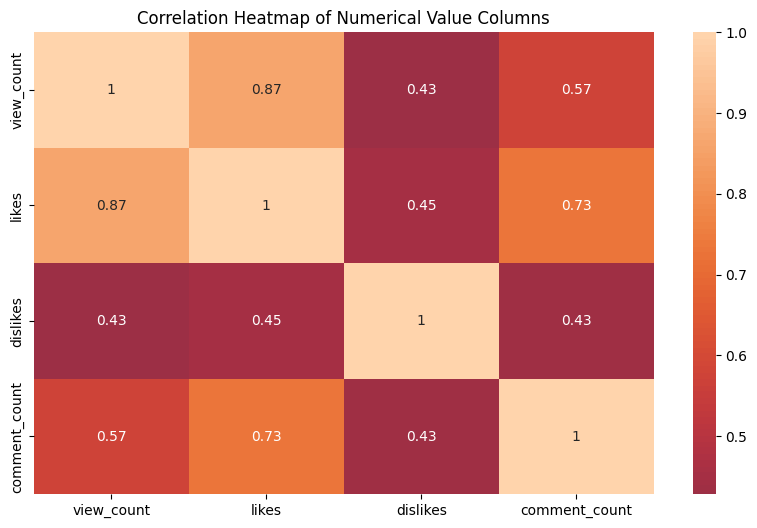

In [34]:
# Calculate correlation matrix
correlation_matrix = df_USA[num_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, center=0)
plt.title('Correlation Heatmap of Numerical Value Columns')
plt.show()

#### TITLE WORD CHOICE

In [35]:
cnt = Counter()

# Finding the occurence of words in video titles
for title in df_USA['cleaned_title']:
    for token in title.split():
        cnt[token] += 1

# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

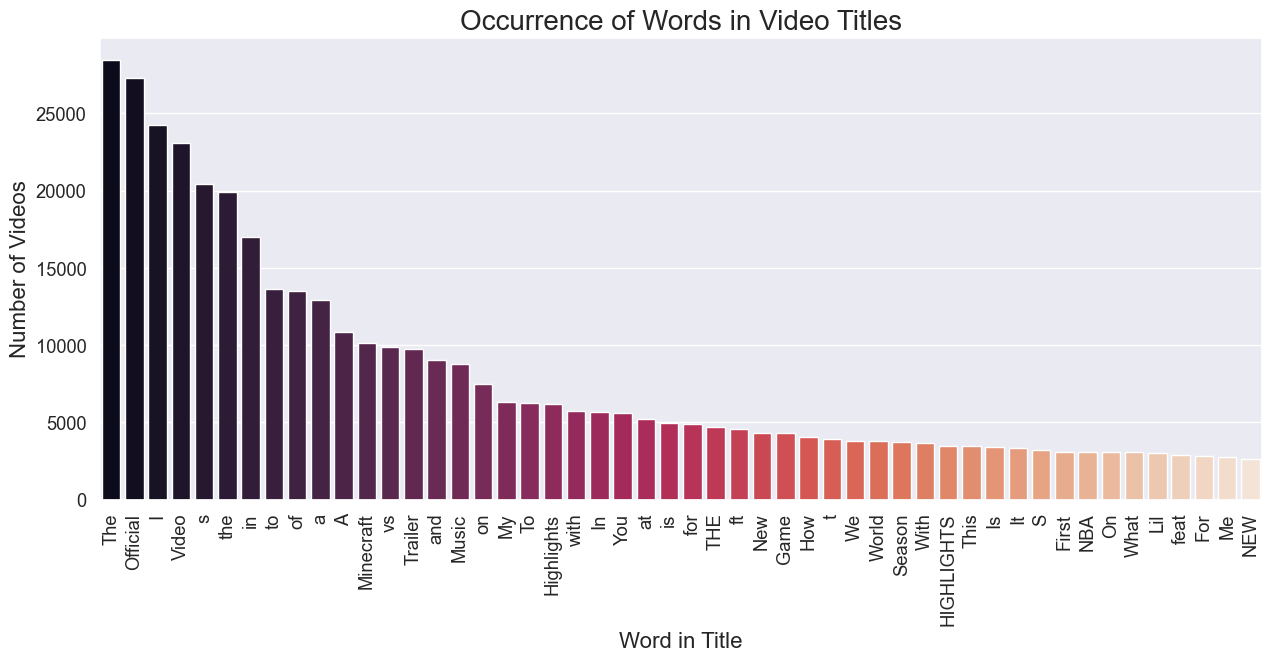

In [36]:
# Graphing number of times the world occure in title
fig= plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

sns.barplot(x=top_words,y=freqs, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Word in Title', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Occurrence of Words in Video Titles', fontsize=20)
plt.show()

It can be noticed that the frequency of stopwords are dominating the chart. 

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
# Define a function to remove stopwords from text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'cleaned_title' column
df_USA['cleaned_title_ns'] = df_USA['cleaned_title'].apply(remove_stopwords)

In [40]:
cnt = Counter()

# Finding the occurence of words in video titles
for title in df_USA['cleaned_title_ns']:
    for token in title.split():
        cnt[token] += 1

# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

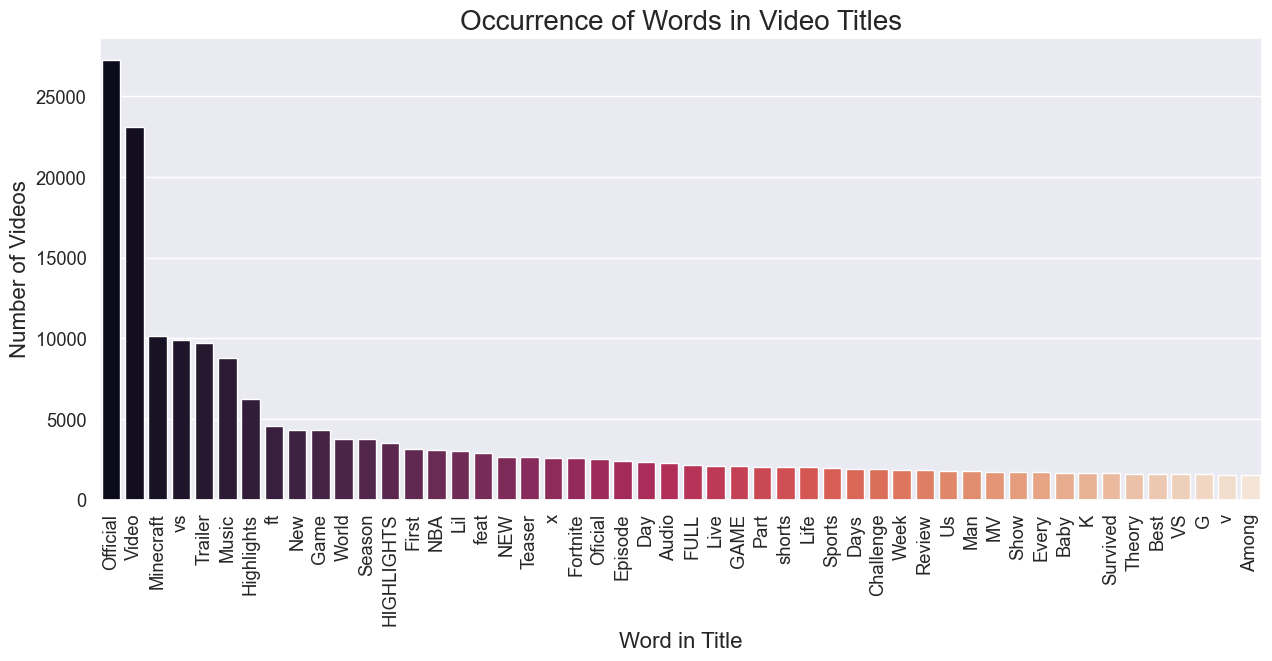

In [41]:
# Graphing number of times the world occure in title
fig= plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

sns.barplot(x=top_words,y=freqs, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Word in Title', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Occurrence of Words in Video Titles', fontsize=20)
plt.show()

It can be observed that the top word occurances in the titles are: 'Official', 'Video', 'Minecraft', 'vs', 'Trailer', 'Music', 'Highlights', 'ft', 'New', and 'Game'. 

Although it can be assumed in most of the cases that the words like 'Official', 'Video', 'Game', Trailer', etc. are associated with eachother. For example: "New Game", "New Video", "Official video", etc.

The observations also revealed that the word 'official' is frequently searched, likely attributable to a spelling error.




In [42]:
import plotly.express as px

# Create a DataFrame with top_words and freqs
data = {'Word in Title': top_words, 'Number of Videos': freqs}
df_plotly = pd.DataFrame(data)

# Create an interactive bar chart using Plotly
fig = px.bar(df_plotly, x='Word in Title', y='Number of Videos', title='Occurrence of Words in Video Titles')

# Save the interactive chart as an HTML file
#fig.write_html("interactive_chart.html")


D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



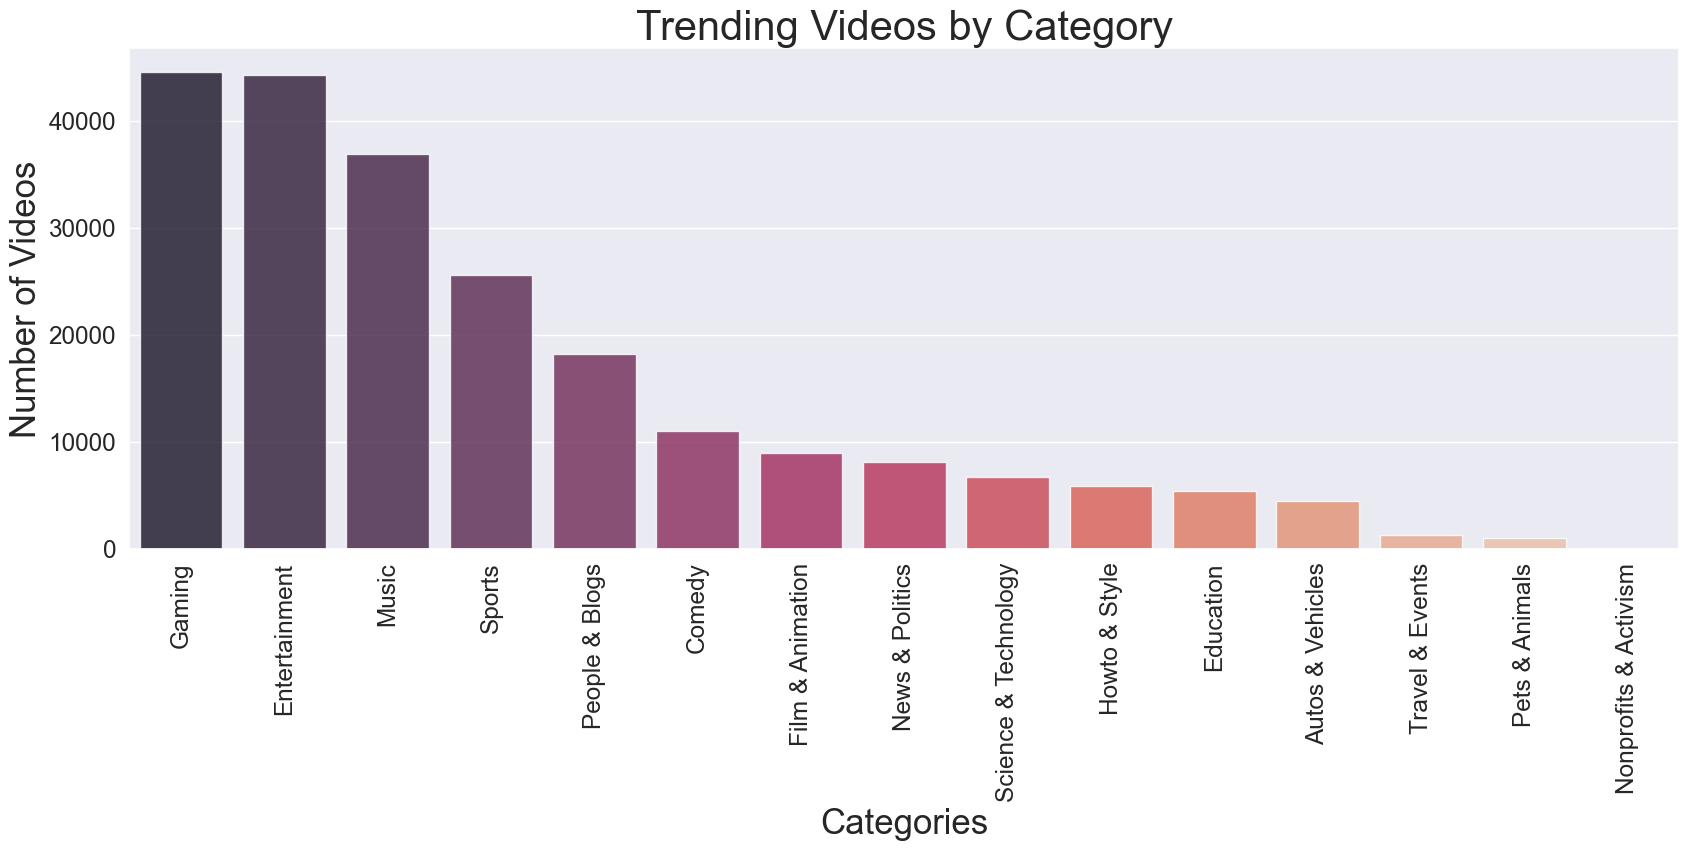

In [43]:
# Bar graph for number of videos per category
sns.set_style("darkgrid")
sns.set(font_scale=1.6)

categories = df_USA['categoryId'].value_counts()

plt.figure(figsize=(20,6.5))
sns.barplot(x=categories.index, y=categories.values, alpha=0.8, palette="rocket")

sns.set(font_scale=1.6)
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Trending Videos by Category', fontsize=30)
plt.show()

Figure 2 clearly highlights the Entertainment category as the frontrunner, boasting an impressive 45,000 trending videos. This hefty count represents roughly one-fifth of the entire dataset, emphasizing its immense popularity among viewers. Following closely, the Gaming category claims nearly 42,000 videos, securing another significant one-fifth share of the dataset.

It's worth noting the Music category's substantial presence, with just under 40,000 videos. While other categories don't quite reach this level, the Sports category stands out with over 25,000 videos, indicating a robust viewership. In contrast, the remaining categories have less than 20,000 videos each, further underscoring the dominance of Entertainment, Gaming, Music, and Sports in the trending video landscape.

In [44]:
df = df_USA.copy()

In [45]:
# Caculating the percentages for top 4 categories
entertainment = df[df['categoryId'] == 'Entertainment']['categoryId'].count() / df['categoryId'].count() * 100
gaming = df[df['categoryId'] == 'Gaming']['categoryId'].count() / df['categoryId'].count() * 100
music = df[df['categoryId'] == 'Music']['categoryId'].count() / df['categoryId'].count() * 100
sports = df[df['categoryId'] == 'Sports']['categoryId'].count() / df['categoryId'].count() * 100

# Calculating the percentages for bottom 3 categories
travelandevents = df[df['categoryId'] == 'Travel & Events']['categoryId'].count() / df['categoryId'].count() * 100
petsandanimals = df[df['categoryId'] == 'Pets & Animals']['categoryId'].count() / df['categoryId'].count() * 100
nonprofits = df[df['categoryId'] == 'Nonprofits & Activism']['categoryId'].count() / df['categoryId'].count() * 100
cars = df[df['categoryId'] == 'Autos & Vehicles']['categoryId'].count() / df['categoryId'].count() * 100

In [46]:
#Lets print the percentages
print("Top 5:")
print("Entertainment:",entertainment)
print("Gaming:",gaming)
print("Music:",music)
print("Sports:",sports)
print("\n")
print("Least 4:")
print("Autobiles and cars",cars)
print("Travel & Events:",travelandevents)
print("Pets & Animals",petsandanimals)
print("Nonprofits & Activism",nonprofits)


Top 5:
Entertainment: 19.915845371495433
Gaming: 20.038252103865712
Music: 16.593762656946133
Sports: 11.514333288330858


Least 4:
Autobiles and cars 1.9958597722874758
Travel & Events: 0.569281310472076
Pets & Animals 0.44642455335043424
Nonprofits & Activism 0.05130282165519103


The insights drawn from this data paint an intriguing picture of how trending videos are distributed across various channel categories. Clearly, the Entertainment category stands out as the frontrunner, making up a whopping 20.02% of all trending videos. This tells us that people simply can't get enough of entertainment-related content, which spans a wide range of topics from movies to celebrity interviews.

Gaming closely trails behind at 19.82%, revealing the immense popularity of gaming content on YouTube. Whether it's game reviews, tutorials, or live streams, the gaming community is thriving on the platform.

Music, with its 16.48% share, remains a constant favorite, showcasing the universal appeal of melodies and music-related videos. Sports, at 11.39%, also garners a strong following, indicating the widespread interest in athletic events and sports-related content.

On the flip side, categories like Automobiles and Cars, Travel & Events, Pets & Animals, and Nonprofits & Activism make up the smallest fraction of trending videos, each contributing less than 2%. While these categories may not enjoy the same level of popularity as the big four, they still have their dedicated audiences.

What's particularly striking is that Entertainment, Gaming, Music, and Sports collectively capture nearly 68% of the trending video landscape. This underscores their powerful influence and ability to captivate YouTube viewers around the world.

#### CHANNEL FREQUENCY

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



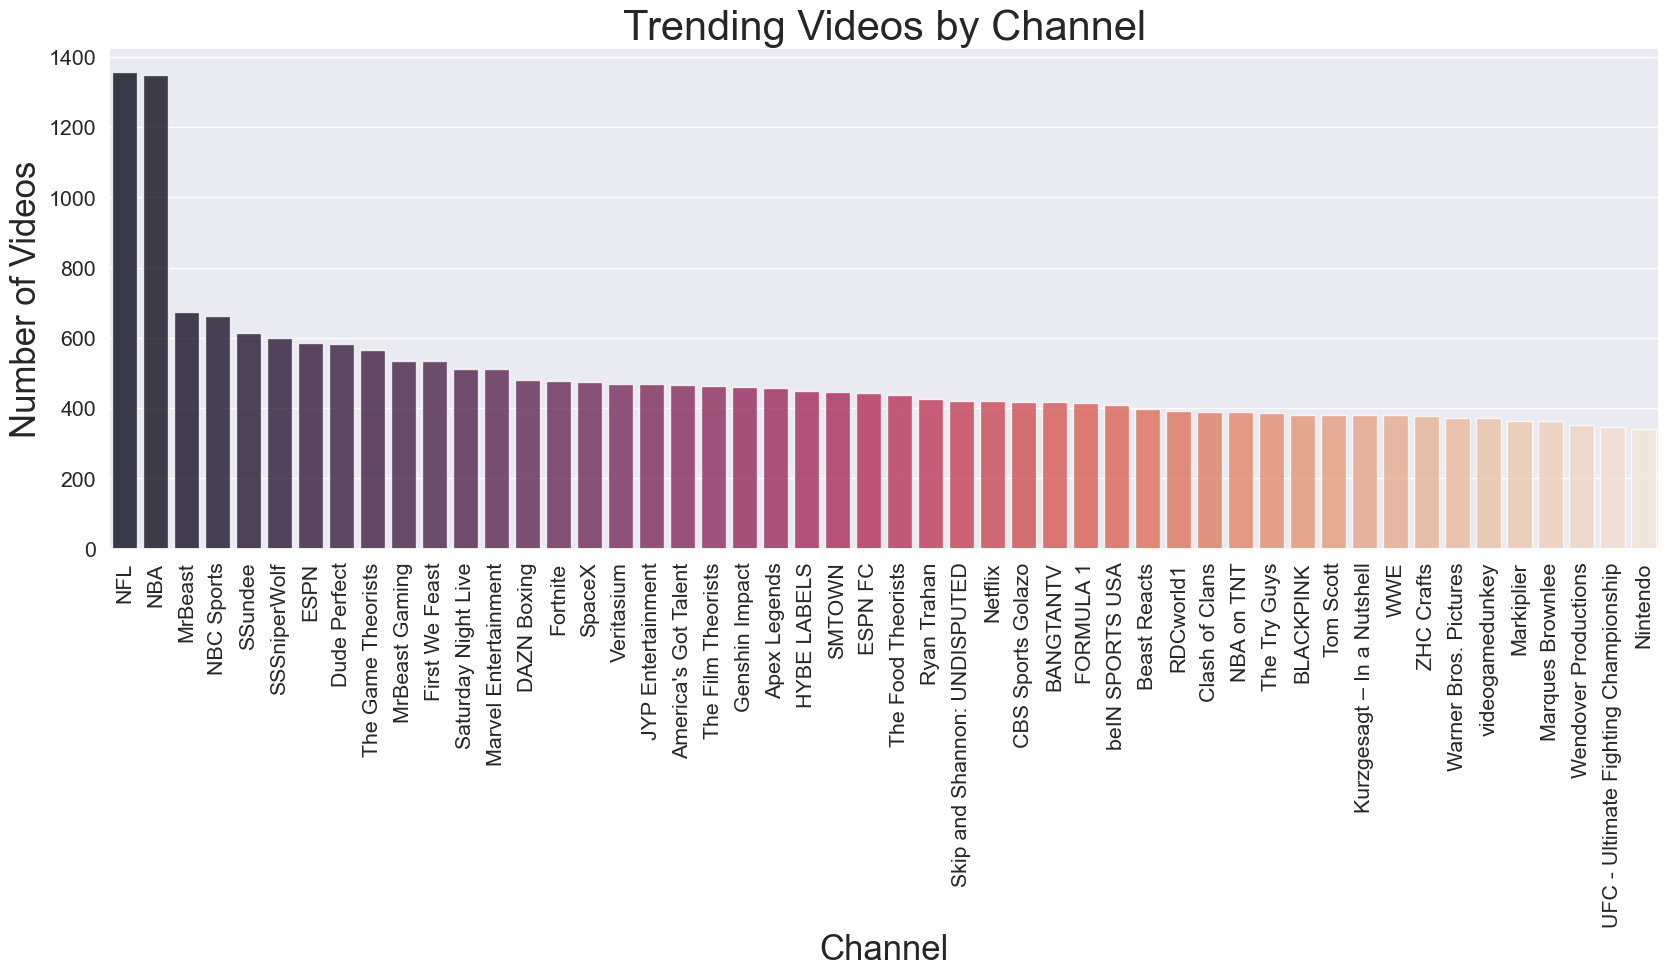

In [47]:
sns.set_style("darkgrid")
sns.set(font_scale=1.4)

channel_freq = df['channelTitle'].value_counts()
channel_freq = channel_freq[0:50]

# Bar graph for number of videos for the top 50 channels
plt.figure(figsize=(20, 6.5))
sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Trending Videos by Channel', fontsize=30)
plt.show()

In [48]:
channel_freq[:]

channelTitle
NFL                                     1357
NBA                                     1349
MrBeast                                  674
NBC Sports                               663
SSundee                                  613
SSSniperWolf                             599
ESPN                                     585
Dude Perfect                             583
The Game Theorists                       565
MrBeast Gaming                           535
First We Feast                           534
Saturday Night Live                      512
Marvel Entertainment                     511
DAZN Boxing                              480
Fortnite                                 478
SpaceX                                   475
Veritasium                               469
JYP Entertainment                        468
America's Got Talent                     465
The Film Theorists                       462
Genshin Impact                           461
Apex Legends                             4

The frequency distribution of channel titles reveals interesting insights into the popularity of YouTube channels among trending videos. Here are some key observations:

NFL and NBA are the top two most frequently occurring channel titles in the dataset, with 1357 and 1349 appearances, respectively. This suggests a strong interest in American football and basketball content on YouTube, especially related to the National Football League (NFL) and National Basketball Association (NB).

MrBeast follows as the third most common channel title with 674 appearances. MrBeast is known for his philanthropic and entertaining content, often involving large-scale challenges and giveaays.

NBC Sports and SSundee take the fourth and fifth positions with 663 and 613 occurrences, respectively. NBC Sports is a prominent sports broadcasting network, while SSundee is a popular gaming content ceator.

The list continues with a diverse range of channels, including sports networks like ESPN (585 appearances), entertainment channels like Marvel Entertainment (511 appearances), and gaming-focused channels like MrBeast Gaming (535 apperances).

Other notable mentions include First We Feast (534 appearances), known for its popular interview series "Hot Ones," and SpaceX (492 appearances), the aerospace manufacturer and space transportation company founded byElon Musk.

The dataset also includes music-related channels like JYP Entertainment (468 appearances) and HYBE LABELS (450 appearances), reflecting the significant prese nce of K-pocontent

Channels associated with sports, gaming, entertainment, and technology appear frequently, highlighting the diverse interests of YouTube viewers\


It came as a surprise to see 'SSSniperWolf' maintaining a top position in the frequency distribution, especially considering the significant shift in content across YouTube. Equally unexpected was the absence of 'Valorant,' a highly popular first-person shooter (FPS) game, within the top 60 channel titles. This is particularly noteworthy given 'Valorant's' status as one of the leading games for online streaming content at the momentuTube viewers.

In [49]:
channel_freq[:10]

channelTitle
NFL                   1357
NBA                   1349
MrBeast                674
NBC Sports             663
SSundee                613
SSSniperWolf           599
ESPN                   585
Dude Perfect           583
The Game Theorists     565
MrBeast Gaming         535
Name: count, dtype: int64

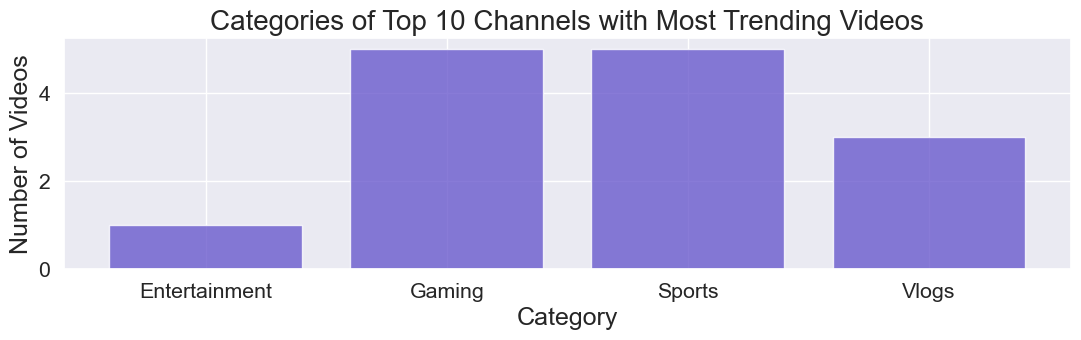

In [50]:
d = {'Entertainment': 1, 'Gaming': 5, 'Sports': 5, 'Vlogs': 3}

# Bar graph for the number of videos per category for the top 10 channels with trending videos
plt.figure(figsize=(13,3))
plt.bar(range(len(d)), list(d.values()), align='center', alpha=0.8, 
        color="slateblue")
plt.xticks(range(len(d)), list(d.keys()))
plt.xlabel("Category", fontsize=18)
plt.ylabel("Number of Videos",fontsize=18)
plt.title('Categories of Top 10 Channels with Most Trending Videos', 
          fontsize=20)
plt.show()

Our earlier exploration of the categories supports the observation that gaming constitutes nearly 20% of the videos. However, it's noteworthy that many channels producing entertainment content may not categorize themselves under the "Entertainment" category. This could be due to various reasons, such as channel identity or content diversity.

In the case of music, it appears that a significant portion of channels falls into the category of personal channels. These creators often engage in vlogging, and occasionally, they produce music content. When these music videos go viral and land on the trending page, they automatically fall into the "Music" category. Consequently, the "Music" category accumulates a substantial number of videos.

<Axes: >

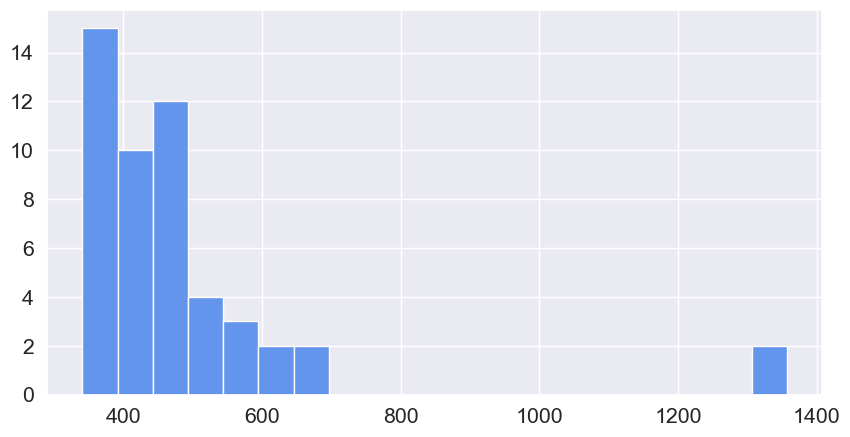

In [51]:
plt.figure(figsize=(10,5))
channel_freq.hist(bins=20, color="cornflowerblue")

In [52]:
df.median(numeric_only='None')

view_count           950070.5
likes                 41093.0
dislikes                  0.0
comment_count          2891.0
comments_disabled         0.0
ratings_disabled          0.0
dtype: float64

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
view_count,222210.0,2.561778e+06,7.694308e+06,0.0,475404.75,950070.5,2130158.5,277791741.0
likes,222210.0,1.283404e+05,4.200001e+05,0.0,18134.00,41093.0,101103.0,16021534.0
dislikes,222210.0,1.306850e+03,8.640330e+03,0.0,0.00,0.0,663.0,879354.0
comment_count,222210.0,1.067134e+04,7.845600e+04,0.0,1334.00,2891.0,6735.0,6738537.0


In [54]:
df['view_count'].mean()

2561778.3385221185

Avg view count : 2580066.511\
Median view count : 951195.0 

With the average being larger than the median, this conveys that the distribution is strongly skewed to the right.

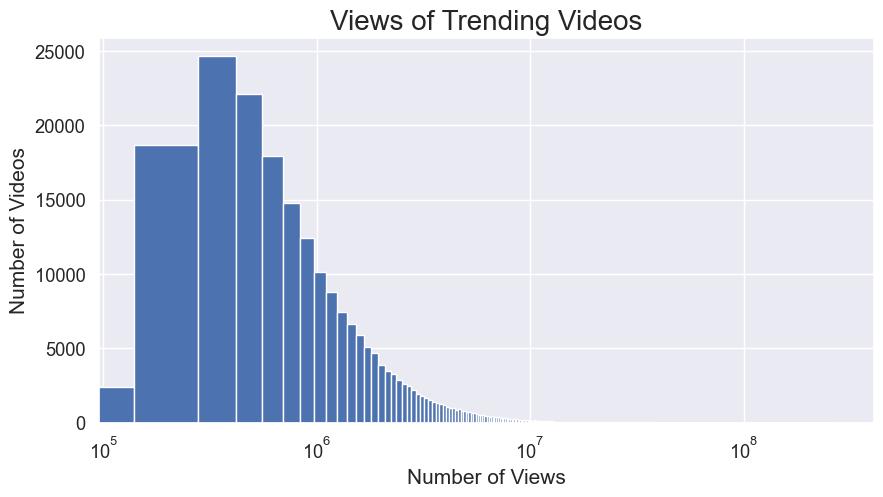

In [55]:
# Histogram of the views data for all the videos
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 5))
v1 = df['view_count'].hist(bins=2000)

plt.xscale('log') # Set x-axis to logarithmic scale
plt.xlabel('Number of Views', fontsize=15)
plt.ylabel('Number of Videos', fontsize=15)
plt.title('Views of Trending Videos', fontsize=20)

plt.show()

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



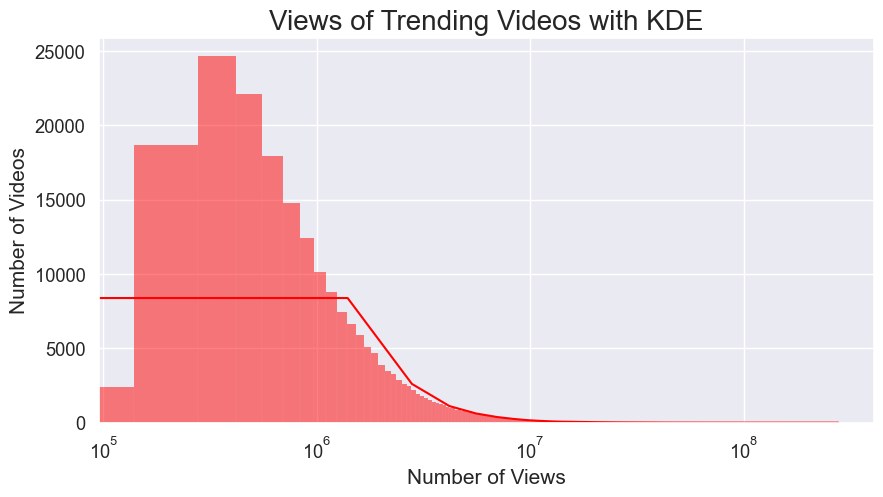

In [56]:

sns.set_style("darkgrid")
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 5))
v1 = sns.histplot(df['view_count'], bins=2000, kde=True, color='red')

plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Number of Views', fontsize=15)
plt.ylabel('Number of Videos', fontsize=15)
plt.title('Views of Trending Videos with KDE', fontsize=20)

plt.show()

In [57]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [58]:
# Create new columns for year, month, day, and time
df['start_year'] = df['publishedAt'].dt.year
df['start_month'] = df['publishedAt'].dt.month
df['start_day'] = df['publishedAt'].dt.day

df['trend_year'] = df['trending_date'].dt.year
df['trend_month'] = df['trending_date'].dt.month
df['trend_day'] = df['trending_date'].dt.day

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 222210 entries, 0 to 226587
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   title              222210 non-null  object        
 1   publishedAt        222210 non-null  datetime64[ns]
 2   channelId          222210 non-null  object        
 3   channelTitle       222210 non-null  object        
 4   categoryId         222210 non-null  object        
 5   trending_date      222210 non-null  datetime64[ns]
 6   tags               222210 non-null  object        
 7   view_count         222210 non-null  int64         
 8   likes              222210 non-null  int64         
 9   dislikes           222210 non-null  int64         
 10  comment_count      222210 non-null  int64         
 11  comments_disabled  222210 non-null  bool          
 12  ratings_disabled   222210 non-null  bool          
 13  description        222210 non-null  object       

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,...,ratings_disabled,description,cleaned_title,cleaned_title_ns,start_year,start_month,start_day,trend_year,trend_month,trend_day
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,2020-08-12,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,5855,...,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,I ASKED HER TO BE MY GIRLFRIEND,ASKED GIRLFRIEND,2020,8,11,2020,8,12
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,2020-08-12,"[apex legends, apex legends characters, new ap...",2381688,146739,2794,...,False,"While running her own modding shop, Ramya Pare...",Apex Legends Stories from the Outlands The End...,Apex Legends Stories Outlands Endorsement,2020,8,11,2020,8,12
2,I left youtube for a month and THIS is what ha...,2020-08-11,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,Entertainment,2020-08-12,"[jacksepticeye, funny, funny meme, memes, jack...",2038853,353787,2628,...,False,I left youtube for a month and this is what ha...,I left youtube for a month and THIS is what ha...,left youtube month happened,2020,8,11,2020,8,12
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11,UCbg_UMjlHJg_19SZckaKajg,XXL,Music,2020-08-12,"[xxl freshman, xxl freshmen, 2020 xxl freshman...",496771,23251,1856,...,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,XXL Freshman Class Revealed Official Announcement,XXL Freshman Class Revealed Official Announcement,2020,8,11,2020,8,12
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,Howto & Style,2020-08-12,"[the labrant family, diy, interior design, mak...",1123889,45802,964,...,False,Transforming The LaBrant Family's empty white ...,Ultimate DIY Home Movie Theater for The LaBran...,Ultimate DIY Home Movie Theater LaBrant Family,2020,8,11,2020,8,12


D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Text(0.5, 1.0, 'Views vs Likes')

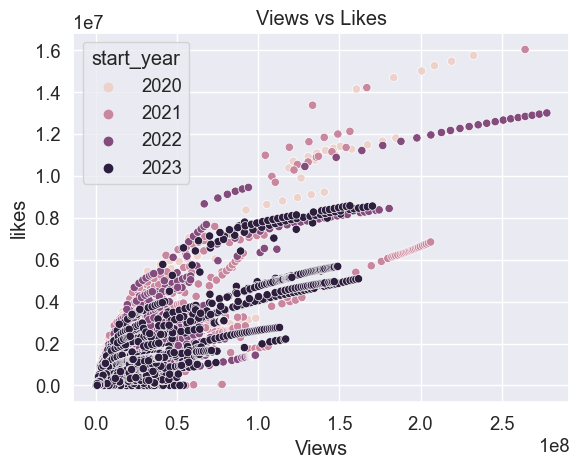

In [59]:
# view_count	likes	dislikes	comment_count
sns.scatterplot(x = 'view_count', y = 'likes', data = df, hue = 'start_year')
plt.xlabel('Views')
plt.title('Views vs Likes')

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype

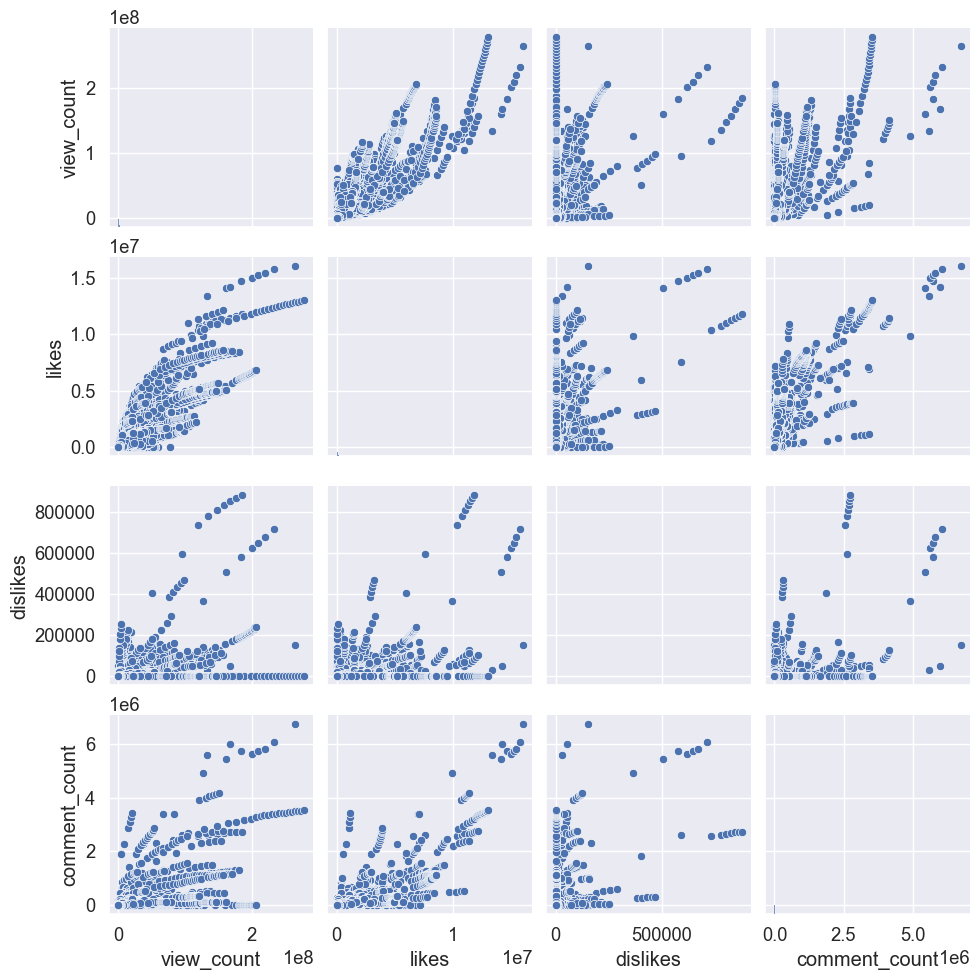

In [60]:
# Select the columns you want to include in the pair plot
selected_columns = ['view_count', 'likes', 'dislikes', 'comment_count']

# Create the pair plot
sns.pairplot(df[selected_columns])

# Display the plot
plt.show()

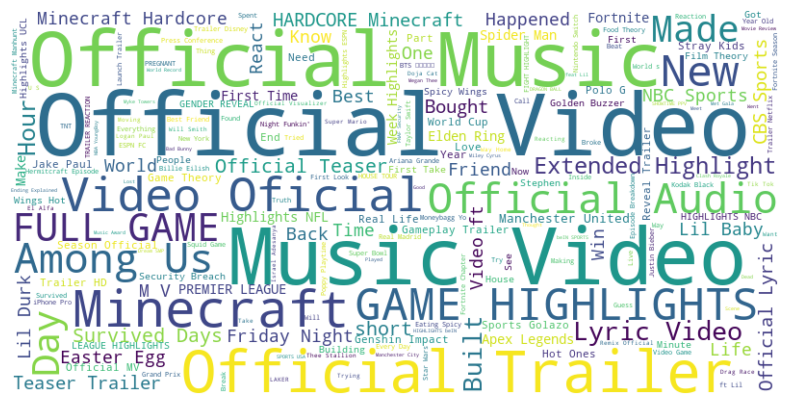

In [61]:
# Word cloud
# Assuming df_USA is your DataFrame containing the 'title' column

# Combine all titles into a single string
all_titles = ' '.join(df['title'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

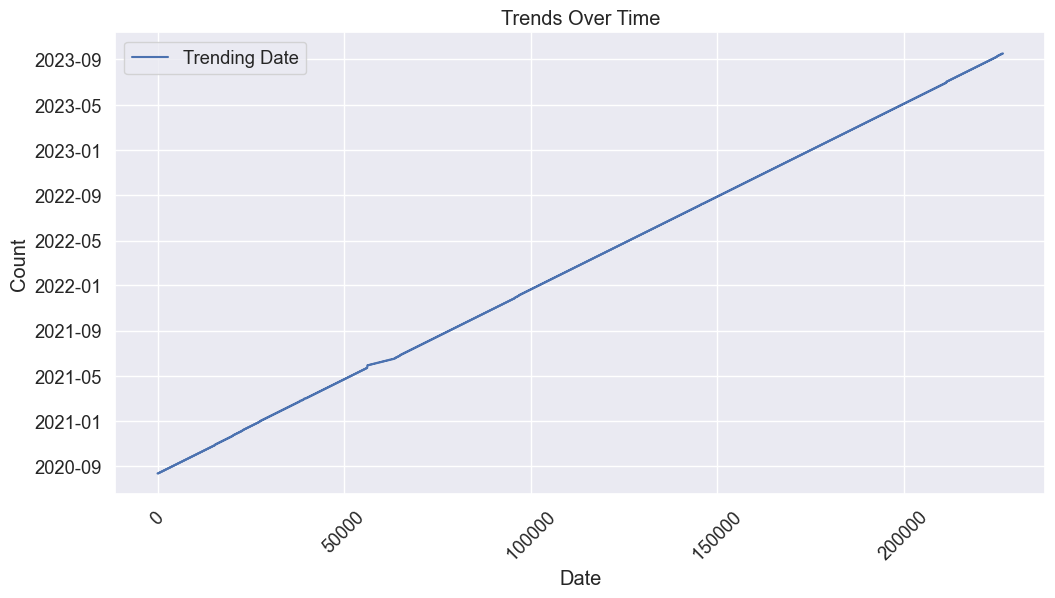

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df['trending_date'], label='Trending Date')
#plt.plot(df['publishedAt'], label='Published Date')
plt.title('Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Masters-2023\Machine Learning\ML\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



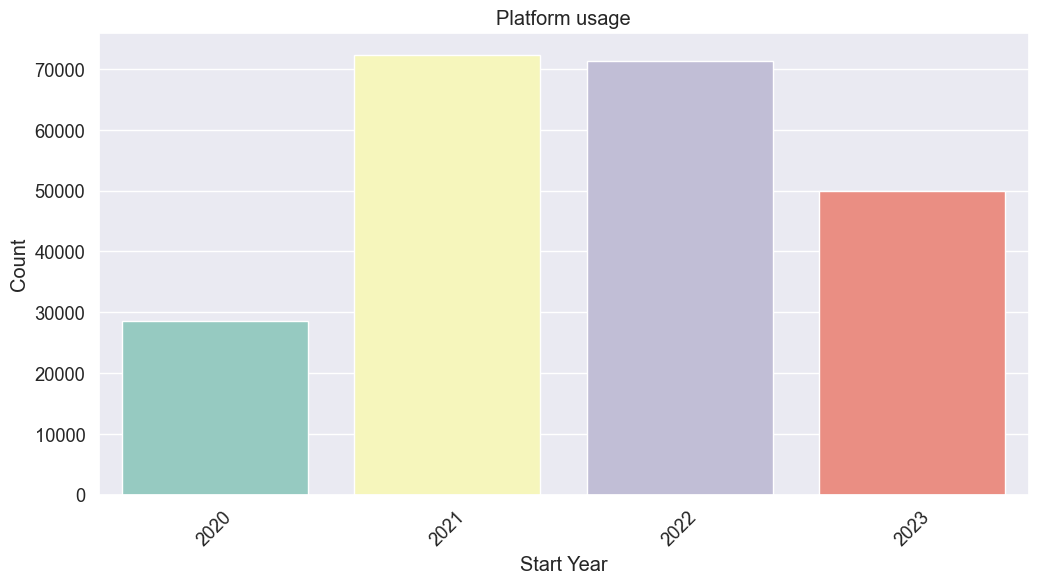

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='start_year', palette='Set3')
plt.title('Platform usage')
plt.xlabel('Start Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [64]:
### Saving the transformed data
df.to_csv('Cleaned_video.csv')